Q1.

a) In CNN, filters are also called kernel. For algorithms like SIFT, the filters were built with a complex procedure with gradients of pixels and 8 bins of histogram. But for CNN, it learns multiple filters, which means it requires only the number of filters, their size, and the CNN will get good filters automatically.

b)For filters with SIFT-like algorithms, although it may be complex to configure, but it's much faster compared with CNN as there's no training required. For filters with CNN, it let the classification performed by CNN to have much higher accuracy than SIFT-like algorithms. But, it would require a huge amount of data (large dataset) for it to be trained on, and this cause it to be slow, otherwise, it would not have good performance for classification tasks.

Q2.

For locally-connected layers, each neuron has its own filter, and the weight is not shared with others, so in this way, the number of parameters would get increased a lot, and in this way, overfitting may occur if there's not enough data to train on. Since with fully connected mlp the filter and weight is shared for the entire image and for locally connected mlp the filter and weight is different for each neuron, it's possible that locally connected mlp would have better performance with the detection of changes in spatial variations. Also, the kernel filters for locally-connected mlp is different for each neuron at each location while for fully-connected mlp the kernel filters behave like sliding windows that move across the image. As mentioned, for locally-connected mlp, since the kernel filters are different and the weights is not shared with each neurons, the locally-connected mlp would required more kernel filters.

Q3.

For a neural network, the learning rate determines how fast it would converge to the final optimal solution. If the learning rate is small, the network would take longer to get the the optimum, or it may never reach the optimum and get stuck mid-way. If the learning rate is large, the network may reach optimum really fast, or it could diverge from the optimum and ended up with non-optimum result. As for the batch size, it's the number of training examples in one forward/backward pass. Larger batch size could speed up the training speed as it allows parallelized computations, but if the batch size is too large, then it could cause poor generalization problem. While smaller batch size would have lower generalization error and would required less memory, but if the batch size is too small, then it would not guarantee the network will converge to the global optimum. Finally, for the training time, it's normally depend on the number of epochs we specified. Large number of epochs would take longer and may cause overfitting, while smaller number of epochs may cause the network not being able to get to the global optimum.

Q4.

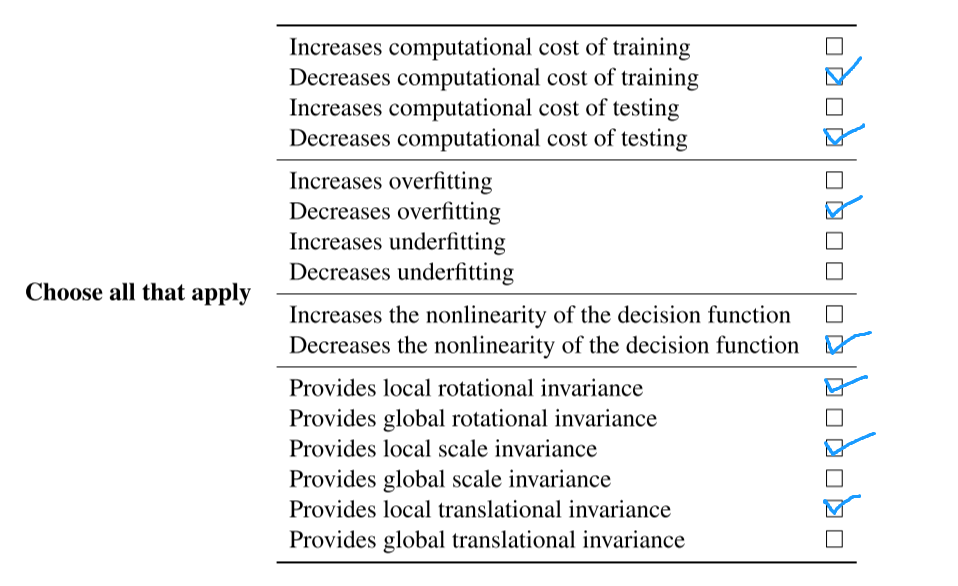

Q5.


```
################
# FORWARD PASS:
# This is where we take our current estimate of the weights and biases
# and compute the current error against the training data.

# Step 1:
# Compute the output response to this 'img' input for each neuron (linear unit).
# Our current estimate for the weights and biases are stored in:
#    self.W
#    self.b
# Remember: use matrix operations.
logits = np.matmul(img, self.W) + self.b # Correspond to equation (1) on page 2 of Assignment
# Our output will be a number for each neuron stored in a vector.


# Step 2:
# Convert these to probabilities by implementing the softmax function.              
prob = np.exp(logits - np.max(logits)) / np.sum(np.exp(logits - np.max(logits))) # Correspond to equation (2) on page 2 of Assignment
#print(prob.shape)  --> prob is of shape (1, 10)

# Step 3:
# Compute the error against the training label 'gt_label' using the cross-entropy loss
# Remember:
#     log has a potential divide by zero error
prob[prob==0] = 10**-10
cross_loss = -np.log(prob[0, gt_label]) # Correspond to equation (3) on page 3 of Assignment
loss_sum += cross_loss
#loss_sum = loss_sum + your_loss_over_all_classes


################
# BACKWARD PASS (BACK PROPAGATION):            
# This is where we find which direction to move in for gradient descent to 
# optimize our weights and biases.
# Use the derivations from the questions handout.

# Step 4:
# Compute the delta_W and delta_b gradient terms for the weights and biases
# using the provided derivations in Eqs. 6 and 7 of the handout.
# Remember:
#    delta_W is a matrix the size of the input by the size of the classes
#    delta_b is a vector
# Note:
#    By equation 6 and 7, we need to subtract 1 from p_j only if it is 
#    the true class probability.

#print(gt_label)
prob[0, gt_label] -= 1
xi = np.reshape(img, (-1, 1))
delta_W = np.matmul(xi, prob)
delta_b = prob

# Step 5:
# Update self.W and self.b using the gradient terms 
# and the self.learning_rate hyperparameter.
# Eqs. 4 and 5 in the handout.

self.W -= self.learning_rate * delta_W
self.b -= self.learning_rate * delta_b

# Once trained, self.W and self.b will be used in accuracy_nn()
# to evalute test performance.
#
# When running for 1 epoch:
# > python3 main.py -data mnist -mode nn
# 
# Epoch 0: Total loss: ~210000
# Training accuracy: ~88%.
```



* NN on MNIST: 90% (Highest Accuracy)
  - Epoch 0 loss: 406593.51 Accuracy 88%
  - Epoch 9 loss: 367252.93 Accuracy 90%
* NN+SVM on MNIST: 89% (Highest Accuracy)
  - Epoch 0 loss: 406908.73 Accuracy 89%
  - Epoch 9 loss: 367800.12 Accuracy 89%
* NN on SceneRec: 14% (Highest Accuracy)
  - Epoch 0 loss: 425926.39 Accuracy 13%
  - Epoch 9 loss: 304972.69 Accuracy 14%
* NN+SVM on SceneRec: 24% (Highest Accuracy)
  - Epoch 0 loss: 430715.89 Accuracy 24%
  - Epoch 9 loss: 283866.37 Accuracy 21%


So for NN only, the performance on MNIST is much better than its performance on SceneRec, and with MNIST being hand-written digits from 0-9 and SceneRec being different scenes of 15 different classes, it's very obvious from the context and the performance of NN on both of these datasets that SceneRec is much more complex than MNIST dataset. As the training goes on, the loss descreases with the increase of the number of Epochs. Although the loss got reduced a lot with the training process, the accuracy didn't really change much. And for the last one, with NN+SVM on SceneRec, I've tried multiple times, but the accuracy it got for only 1 Epoch is always higher than the accuracy it got with 10 Epochs of training. And I'm guessing that maybe this is because of overfitting happened, and hence caused this issue. For this two different classification approaches, while on MNIST, the performance of NN+SVM and only NN are mostly the same, they got very similar losss and acuuracy for both Epoch 0 and Epoch 9. And as for SceneRex, the performance of NN+SVM is noticeably better than the performance of only NN, so with the help of SVM, althoug the loss didn't got much lower, but the accuracy got better. Seeing their results on MNIST and SceneRec, one may say that SVM can help a lot / perform better on the processing/classification of complicated images within a dataset.